<a href="https://colab.research.google.com/github/Khalid-Rafiq-01/Image-Segmentation-Pets-Datset/blob/main/Basic_UNet_TF_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [2]:
pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.5 MB/s eta 0:00:00


The dataset is available in the Tensorflow library!

In [ ]:
# Loading the dataset:
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)
print(info.features)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
print(type(dataset))
print(dataset.keys())

b = len(dataset['train'])
print(f'Length of the train dataset is: {b}')
a = len(dataset['test'])
print(f'Length of the test dataset is: {a}')

In [14]:
print(type(dataset['train']))
first_element = dataset['train'].take(1)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [15]:
for element in first_element:
  print(element)

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Sphynx_158.jpg'>, 'image': <tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 5,  3,  4],
        [ 7,  5,  6],
        ...,
        [ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2]],

       [[ 4,  3,  1],
        [ 5,  3,  4],
        [ 5,  3,  4],
        ...,
        [ 6,  2,  3],
        [ 7,  3,  4],
        [ 8,  4,  5]],

       [[ 4,  3,  1],
        [ 5,  4,  2],
        [ 5,  3,  4],
        ...,
        [ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3]],

       ...,

       [[ 6, 10, 11],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [ 3,  4,  6],
        [ 3,  4,  6],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 4,  5,  9],
        [ 4,  5,  7],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 5,  6, 10],
        [ 5, 

[link text](https://)*Dataset is a dictionary which contains keys as ['train'] and ['test']. Each dataset['train'] contains an 'image' and a 'segmentation mask'* 

**Let us check the distribution of all the image in the above tensorflow dataset** This will have an imortant influence on the perforance of the model!

In [12]:
train_images_shape = []
train_masks_shape = []
elements = dataset['train'].take(b)

for element in elements:
  train_images_shape.append(element['image'].shape)
  train_masks_shape.append(element['segmentation_mask'].shape)


In [11]:
# Let us only work with the train images, sime the train masks would ahve similar reslolution with different channels:
train_images_shape = np.array(train_images_shape)
print(train_images_shape.shape)

(3680, 3)


In [10]:
data_x = [] 
data_y = []
for i in range(b):
  data_y.append(train_images_shape[i][0])
  data_x.append(train_images_shape[i][1])
print(f'The resolution of each of the image along the y axis is: {data_y}')
print(f'The resolution of each of the image along the x axis is: {data_x}')


The resolution of each of the image along the y axis is: [500, 313, 500, 375, 500, 219, 400, 500, 191, 225, 375, 333, 375, 300, 500, 375, 333, 375, 375, 500, 334, 225, 334, 300, 500, 300, 500, 375, 333, 300, 375, 362, 500, 500, 500, 500, 334, 335, 500, 375, 334, 375, 180, 500, 252, 410, 900, 375, 333, 342, 500, 334, 292, 210, 500, 500, 375, 357, 334, 375, 482, 440, 373, 500, 375, 300, 225, 334, 427, 500, 566, 491, 375, 500, 375, 375, 332, 500, 500, 500, 375, 333, 500, 500, 240, 333, 500, 500, 500, 500, 333, 375, 225, 333, 479, 375, 500, 333, 375, 163, 333, 333, 333, 375, 225, 500, 333, 500, 500, 450, 287, 500, 300, 375, 367, 500, 500, 500, 300, 375, 500, 375, 299, 334, 500, 500, 200, 375, 500, 225, 427, 500, 375, 375, 224, 375, 375, 401, 281, 375, 500, 256, 225, 375, 375, 225, 335, 375, 500, 375, 375, 500, 248, 334, 284, 225, 331, 375, 338, 436, 334, 454, 375, 200, 500, 338, 375, 375, 333, 500, 500, 375, 375, 475, 500, 327, 375, 375, 280, 334, 375, 375, 375, 368, 307, 375, 335, 500, 44

*Check the size of first two images:*

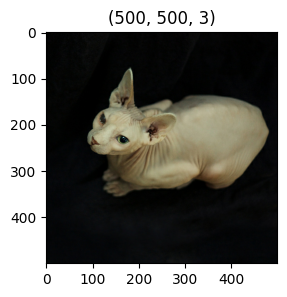

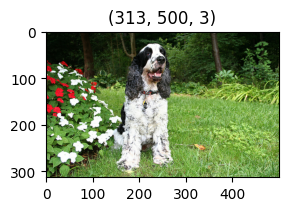

In [16]:
elements = dataset['train'].take(2)
for element in elements:
  plt.figure(figsize = (3,3))
  plt.imshow(element['image'])
  s = element['image'].shape
  plt.title(f'{s}')

Text(0.5, 1.0, 'Resolution of the images in the dataset')

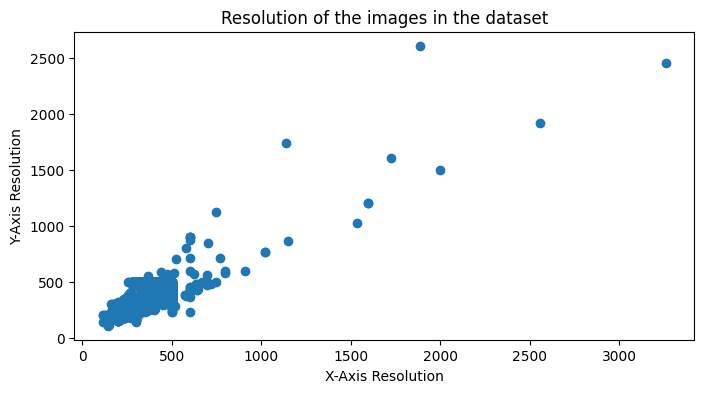

In [17]:
# Plotting the figure resolution dimensions after removing smaller image resolutions:
plt.figure(figsize = (8,4))
plt.scatter(data_x,data_y)
plt.xlabel('X-Axis Resolution')
plt.ylabel('Y-Axis Resolution')
plt.title('Resolution of the images in the dataset')

In [ ]:
# Mean of resolution along the y & x axis:
y_mean =  sum(data_y)/len(data_y)
x_mean =  sum(data_x)/len(data_x)
print(f'The mean resolution of train images along y axis (dim 0): {y_mean}')
print(f'The mean resolution of train images along x axis (dim 0): {x_mean}')

print(f'The min resolution along y-axis is: {min(data_y)}')
print(f'The max resolution along y-axis is: {max(data_y)}')

print(f'The min resolution along x-axis is: {min(data_x)}')
print(f'The max resolution along x-axis is: {max(data_x)}')

The mean resolution of train images along y axis (dim 0): 383.4203804347826
The mean resolution of train images along x axis (dim 0): 431.03342391304346
The min resolution along y-axis is: 108
The max resolution along y-axis is: 2606
The min resolution along x-axis is: 114
The max resolution along x-axis is: 3264


*What is the effect of resizing an image or a mask.*

<_TakeDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


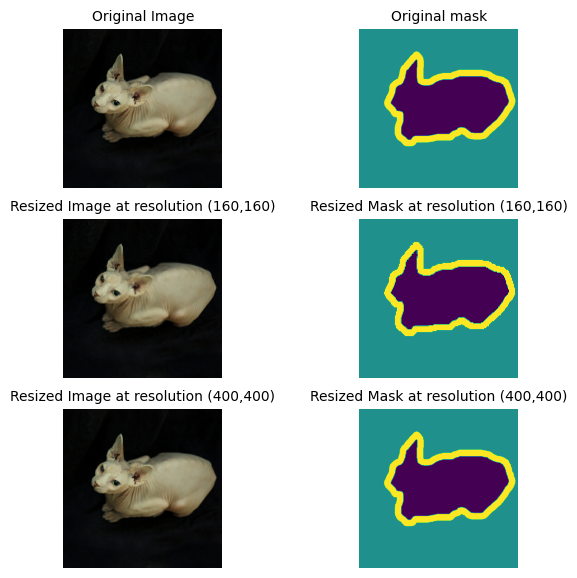

In [ ]:
#Let us take the first image and corresponding mask from the train dataset. Visulaize it, then resize it to (256,256,3) & visualize it! 
datapoint =  dataset['train'].take(1)
print(datapoint)

# Create a figure with two subplots arranged in a single row
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7,7))

for elements in datapoint:
  image = elements['image']
  image = image.numpy()
  axes[0,0].imshow(image)
  axes[0,0].set_title('Original Image', fontsize=10)
  axes[0,0].axis('off')

  mask = elements['segmentation_mask']
  mask = mask.numpy()
  axes[0,1].imshow(mask)
  axes[0,1].set_title('Original mask', fontsize=10)
  axes[0,1].axis('off')

  # Let us just resize the image and the mask by a value of 2, ie from (500,500,3) to (160,160)
  resize_image = cv2.resize(image, (160,160))
  axes[1,0].imshow(resize_image)
  axes[1,0].set_title('Resized Image at resolution (160,160)', fontsize=10)
  axes[1,0].axis('off')

  resize_mask = cv2.resize(mask, (160,160))
  axes[1,1].imshow(resize_mask)
  axes[1,1].set_title('Resized Mask at resolution (160,160)', fontsize=10)
  axes[1,1].axis('off')

  # Let us just resize the image and the mask by a value of 2, ie from (500,500,3) to (400,400)
  resize_image = cv2.resize(image, (400,400))
  axes[2,0].imshow(resize_image)
  axes[2,0].set_title('Resized Image at resolution (400,400)', fontsize=10)
  axes[2,0].axis('off')

  resize_mask = cv2.resize(mask, (400,400))
  axes[2,1].imshow(resize_mask)
  axes[2,1].set_title('Resized Mask at resolution (400,400)', fontsize=10)
  axes[2,1].axis('off')


*# Let us resize all the images to a value of (400,400), which is closer to the central tendency of the entire dataset!*

In [18]:
# Definfing a function that performs data normalization:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1 # Changes the pixel values of masks from (1,2,3) to (0,1,2)
  return input_image, input_mask

*The input datapoint is assumed to be a dictionary with two keys: 'image' and 'segmentation_mask'. These keys are used to extract the corresponding images from the datapoint dictionary.

In [19]:
# Imp: reshaped to (400, 400) -- To the central tendency of the resolutions
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (400, 400))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (400, 400))

  input_image, input_mask = normalize(input_image, input_mask)

 
  return input_image, input_mask


In [20]:
BUFFER_SIZE = 1000

Developing the tensorflow input data pipeline using the tf.Data.Datasets API

In [21]:
# Keeping a batch size of 8.
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE).shuffle(BUFFER_SIZE).batch(8)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(8)


In [22]:
print(type(train_images))
print(len(train_images))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
460


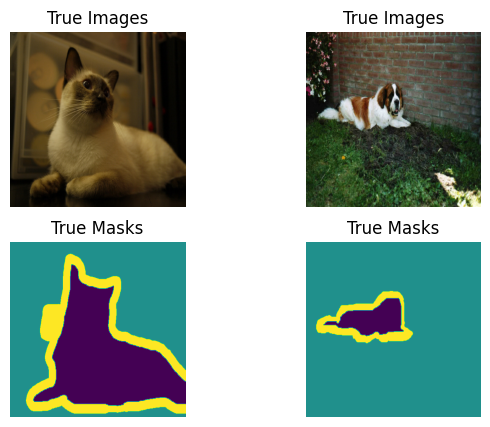

In [23]:
for images, masks in train_images.take(1):
# Create a 2x25 grid of subplots
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

  # Iterate over the first 20 images and masks
  for i in range(2):
    # Plot the image on the left side of the subplot
    axes[0, i].imshow(images[i])
    axes[0, i].axis('off')
    axes[0, i].set_title('True Images')
    # Plot the mask on the right side of the subplot
    axes[1, i].imshow(masks[i])
    axes[1, i].axis('off')
    axes[1, i].set_title('True Masks')

# Show the plot
plt.show()


**Defining the basic DL Architecture**

In [24]:
# importing the necessary libraries:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Activation, Conv2DTranspose, Input, Dropout, BatchNormalization
from keras.models import Model

In [25]:
classes = 3
image_height = 400
image_width = 400
channels = 3

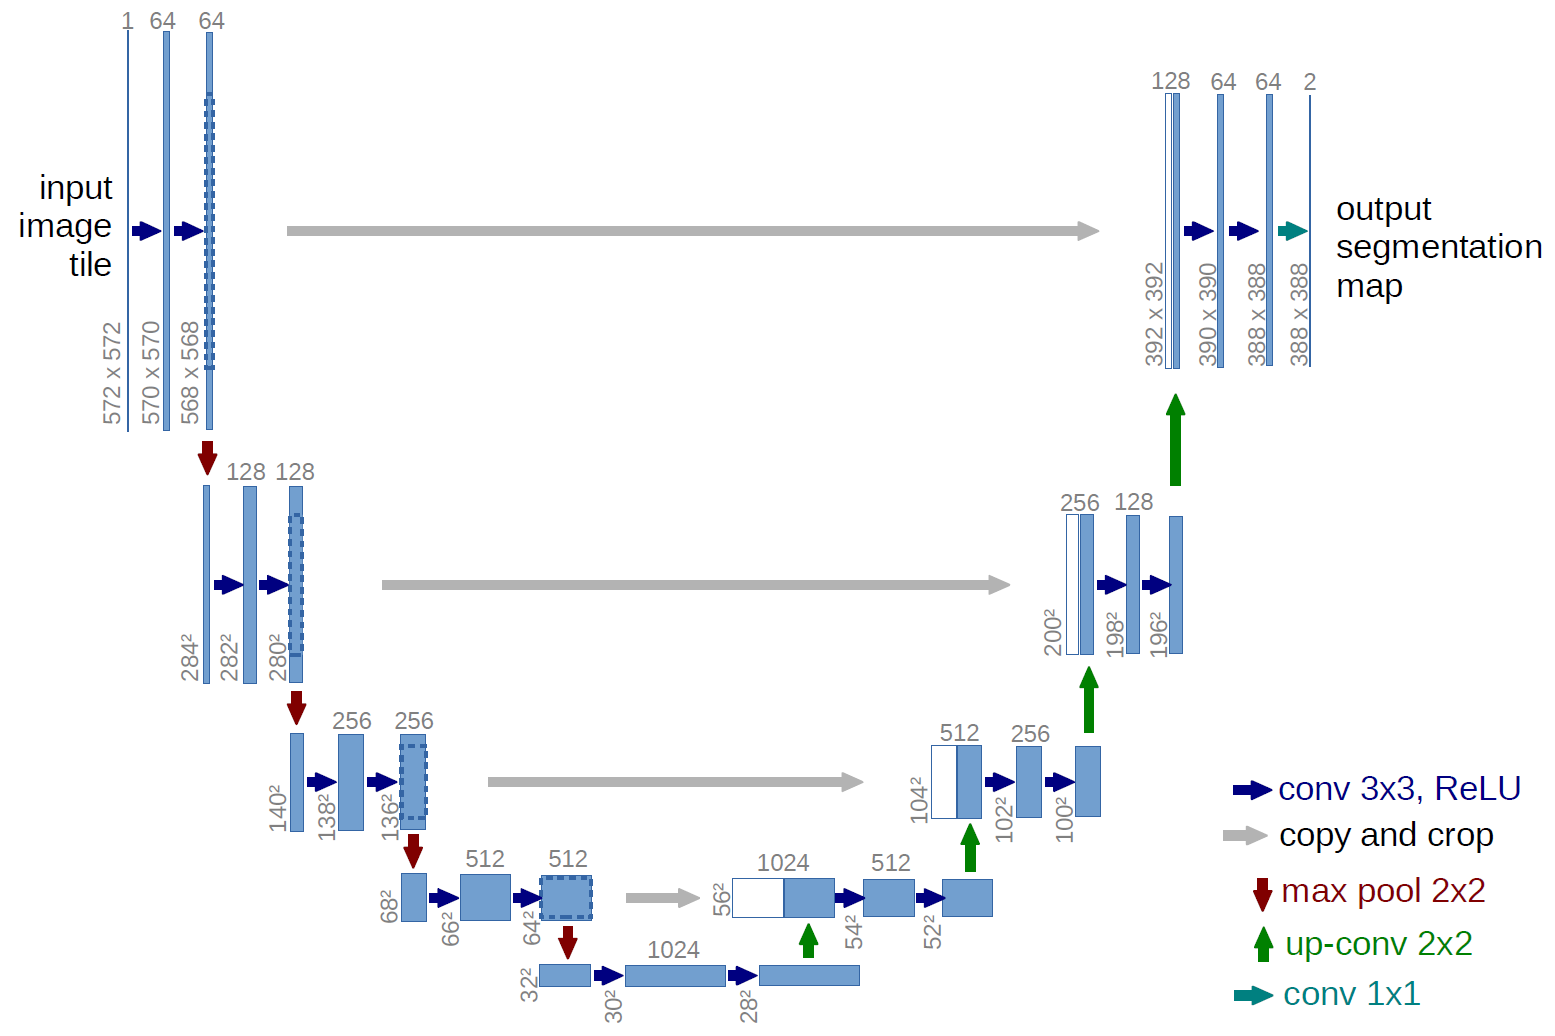

In [26]:
# Defining basic functions for developing the UNet Model----: (# Adding Normalization to the UNet model)
# Let us first define the convolution block: 2*(3,3) convs. Both conv have same num_filters:

def conv_block(input, num_filters):
  x = Conv2D(filters = num_filters, kernel_size = (3,3), kernel_initializer='he_normal', padding='same')(input)
  x = BatchNormalization()(x) # Adding a batch_normalization layer
  x = Activation('relu')(x)

  x = Conv2D(filters = num_filters, kernel_size = (3,3), kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x) # Adding a batch_normalization layer
  x = Activation('relu')(x)
  return x

# Let us now define the Encoding Block:
def encoder_block(input, num_filters):
  x = conv_block(input, num_filters)
  p = MaxPooling2D(pool_size=(2, 2))(x)
  return x, p

# Let us now define the Decoding Block: up conv (2,2) --> Concatination --> (3,3) ReLu convs
def decoder_block(inputs, skip_features, num_filters):
  x = Conv2DTranspose(filters=num_filters, kernel_size=(2,2), strides=2, padding='same')(inputs)
  x = keras.layers.concatenate([x, skip_features])
  x = conv_block(x, num_filters)
  return x

In [27]:
# Building the basic U-Net Model:

def basic_unet_model(classes, image_height, image_width, channels):
  # Defining the input:
  inputs = Input((image_height, image_width, channels))
  #Creating and augmentation layer:
  #x = image_augment(inputs)

  # Defining the Encoding section: 
  s1, p1 = encoder_block(inputs, 16) # s will be used for skip outputs for concatination #(256,256)
  s2, p2 = encoder_block(p1, 32)     # (128,128)
  s3, p3 = encoder_block(p2, 64)     # (64,64)
  s4, p4 = encoder_block(p3, 128)    #  (32,32) ---> (16,16,128)


  # Bridge:
  b1 = conv_block(p4,256)   # (8,8,512)


  # Decoder:
  d1 = decoder_block(b1,s4,128)   # observe that size(s1)
  d2 = decoder_block(d1,s3,64)
  d3 = decoder_block(d2,s2,32)
  d4 = decoder_block(d3,s1,16)

  # Output:
  outputs = Conv2D(filters = classes, kernel_size = 1, padding = "same", activation = "softmax")(d4)

  # Compiling the Model:
  model = Model(inputs=inputs, outputs=outputs)
  return model

# Getting the basic Unet Model:

def get_basic_unet_model():
  return basic_unet_model(classes=classes, 
                    image_height=image_height, 
                    image_width=image_width, 
                    channels=channels)
basic_model = get_basic_unet_model()
basic_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 400, 400, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 400, 400, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [28]:
from keras.optimizers import Adam
lr = 0.00025

In [29]:
basic_model.compile(optimizer = Adam(learning_rate=lr), loss="sparse_categorical_crossentropy", metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint("pets_segmentation_basic_reshape.h5", save_best_only=True)
]

In [30]:
model_history_reshape = basic_model.fit(train_images, epochs=30, validation_data=test_images, callbacks=callbacks)

Epoch 1/30
460/460 [==============================] - 149s 285ms/step - loss: 0.7343 - accuracy: 0.6810 - val_loss: 0.6703 - val_accuracy: 0.7567
Epoch 2/30
460/460 [==============================] - 132s 281ms/step - loss: 0.5153 - accuracy: 0.7902 - val_loss: 0.4785 - val_accuracy: 0.8054
Epoch 3/30
460/460 [==============================] - 132s 281ms/step - loss: 0.4580 - accuracy: 0.8124 - val_loss: 0.4486 - val_accuracy: 0.8178
Epoch 4/30
460/460 [==============================] - 132s 282ms/step - loss: 0.4253 - accuracy: 0.8252 - val_loss: 0.4413 - val_accuracy: 0.8253
Epoch 5/30
460/460 [==============================] - 132s 282ms/step - loss: 0.4022 - accuracy: 0.8343 - val_loss: 0.3897 - val_accuracy: 0.8417
Epoch 6/30
460/460 [==============================] - 132s 282ms/step - loss: 0.3860 - accuracy: 0.8413 - val_loss: 0.4207 - val_accuracy: 0.8332
Epoch 7/30
460/460 [==============================] - 132s 281ms/step - loss: 0.3694 - accuracy: 0.8480 - val_loss: 0.3992 -

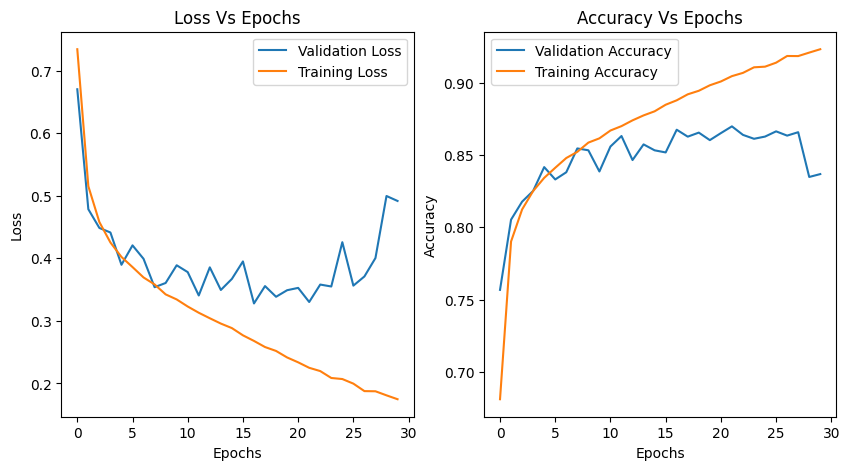

In [31]:
# Plotting the Validation Loss N Validation Accuracy against the number of Epochs:
import pandas as pd
data = pd.DataFrame(model_history_reshape.history)
(a,b) = data.shape

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(a), data['val_loss'], label = "Validation Loss")
plt.plot(range(a), data['loss'], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(a), data['val_accuracy'], label = "Validation Accuracy")
plt.plot(range(a), data['accuracy'], label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epochs")
plt.legend()

In [32]:
from keras.models import load_model
model_path = '/content/pets_segmentation_basic_reshape.h5'
model = load_model(model_path)

#This sometimes makes the RAM crash: Creating a subfolder from test images folder!

# pred_masks = model.predict(test_images)
# pred_masks = np.argmax(pred_masks, axis = 3)

In [33]:
# Sub test_image folder:
test_image_list = []
test_masks_list = []
test_img_subfolder = []
test_mask_subfolder = []

for images, masks in test_images.take(20):
  # images = np.expand_dims(images, axis = 1)
  # masks = np.expand_dims(masks, axis = 1)
  test_image_list.append(images)
  test_masks_list.append(masks)

for i in range(len(test_image_list)):
  for j in range(len(test_image_list[0])):
    test_img_subfolder.append(test_image_list[i][j])
    test_mask_subfolder.append(test_masks_list[i][j])
test_img_subfolder = np.array(test_img_subfolder)
test_mask_subfolder = np.array(test_mask_subfolder)


In [34]:
predicted_masks = model.predict(test_img_subfolder, verbose = 0)

In [35]:
pred_masks = np.argmax(predicted_masks, axis = 3)

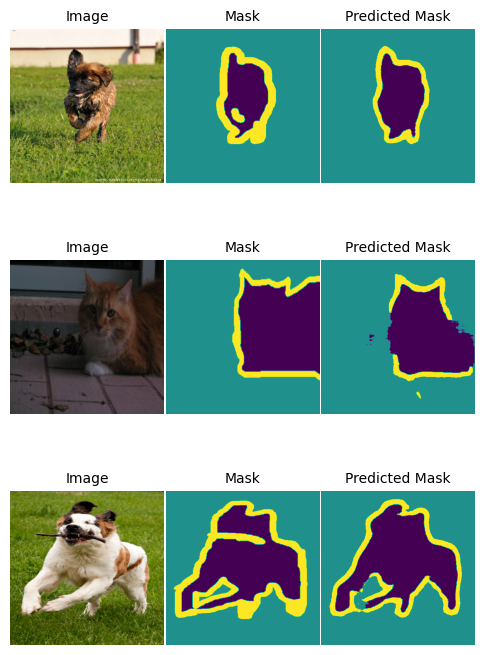

In [36]:
# Define the size of each subplot image
subplot_size = (3, 3)
figsize = (subplot_size[0]*2, subplot_size[1]*3)

# Iterate over the first 20 images, True masks and predicted masks
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=figsize)

for i in range(3):
    # Plot the image on the top row of the subplot
    axes[i, 0].imshow(test_img_subfolder[i])
    axes[i, 0].set_title('Image', fontsize=10)
    axes[i, 0].axis('off')

    # Plot the mask on the middle row of the subplot
    axes[i, 1].imshow(test_mask_subfolder[i])
    axes[i, 1].set_title('Mask', fontsize=10)
    axes[i, 1].axis('off')

    # Plot the predicted mask on the bottom row of the subplot
    axes[i, 2].imshow(pred_masks[i])
    axes[i, 2].set_title('Predicted Mask', fontsize=10)
    axes[i, 2].axis('off')

# Adjust the size and spacing of the subplots
fig.subplots_adjust(hspace=0.001, wspace=0.01)


# Show the plot
plt.show()